<a href="https://colab.research.google.com/github/esmanp/gorengoz2024/blob/main/teknofest2024nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Birinci adımda json tipi veriyi okutarak dataframe tipine dönüştürme işlemi yapılmıştır



In [ ]:
import json
import pandas as pd
import numpy as np

# opening JSON file
f=open("/content/run_results.json")


data= json.load(f)
df=pd.json_normalize(data['product'],record_path='review',errors='raise')

In [ ]:
df=df[['description', 'star']]

In [ ]:
df

,description,star
0,Çoookk memnunum iyi ki almışım. Ürün dayanıklı...,"5 yıldız üzerinden 5,0"
1,"Ürünü Prime kampanyasından 189,00₺ gibi bir ra...","5 yıldız üzerinden 5,0"
2,15 inc bir Macbook Pro ile kullanıyorum. Daha ...,"5 yıldız üzerinden 4,0"
3,hani metali tutar da soğukluğundan kaliteyi hi...,"5 yıldız üzerinden 5,0"
4,Hafif ve gayet kullanışlı. Şık kolay katlanır ...,"5 yıldız üzerinden 5,0"
...,...,...
1820,"Ürün çok iyi, teşekkürler.","5 yıldız üzerinden 5,0"
1821,Samsung Kalitesi mükemmel çalışan sorunsuz ürün,"5 yıldız üzerinden 5,0"
1822,Kaliteli ve bu fiyata alınabilecek en iyi ürün...,"5 yıldız üzerinden 5,0"
1823,512 GB nintendo switch ile tam uyumlu.,"5 yıldız üzerinden 5,0"


### İkinci adımda yorumların sınıflandırılabilmesi işlemi yapılmıştır.

Etiketler tüketicilerin ürüne verdikleri puana (1-5) göre belirlenmiştir.

1, 2 puan olumsuz,

3 puan nötr,

4, 5 puan ise olumlu olarak kabul edilmiştir.


In [ ]:
conditions = [
    (df['star'] == "5 yıldız üzerinden 5,0"),
    (df['star'] == "5 yıldız üzerinden 4,0"),
    (df['star'] == "5 yıldız üzerinden 3,0"),
    (df['star'] == "5 yıldız üzerinden 2,0"),
    (df['star'] == "5 yıldız üzerinden 1,0")
    ]

# create a list of the values we want to assign for each condition
values = ['olumlu', 'olumlu', 'nötr', 'olumsuz','olumsuz']

# create a new column and use np.select to assign values to it using our lists as arguments
df['durum'] = np.select(conditions, values)

# display updated DataFrame
df=df[['description', 'durum']]

In [ ]:
df

,description,durum
0,Çoookk memnunum iyi ki almışım. Ürün dayanıklı...,olumlu
1,"Ürünü Prime kampanyasından 189,00₺ gibi bir ra...",olumlu
2,15 inc bir Macbook Pro ile kullanıyorum. Daha ...,olumlu
3,hani metali tutar da soğukluğundan kaliteyi hi...,olumlu
4,Hafif ve gayet kullanışlı. Şık kolay katlanır ...,olumlu
...,...,...
1820,"Ürün çok iyi, teşekkürler.",olumlu
1821,Samsung Kalitesi mükemmel çalışan sorunsuz ürün,olumlu
1822,Kaliteli ve bu fiyata alınabilecek en iyi ürün...,olumlu
1823,512 GB nintendo switch ile tam uyumlu.,olumlu


<Axes: xlabel='durum', ylabel='count'>

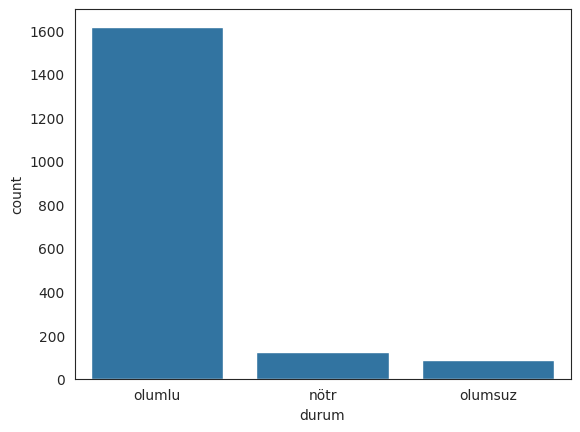

In [ ]:
import seaborn as sns
sns.set_style("white")
sns.countplot(x ='durum', data = df)

**Veri imbalanced. Bu problemi çözmek için ne yapmak lazım bakılması gerekiyor.**

Benzer etiketleme işlemini TexttBlob kütüphanesi aracılığı ile de yapabilirdik.
(Denedim yapamadım. Araştırmak lazım)

Hangi Yöntemler ile çözüm geliştirildi sorusuna cevap verebilmek için takip edilmesi gereken adımlar var.

1) Veri Ön İşleme

Veriyi modellere hazır hale getirebilmek için gereken işlemlerdir.
Sözcüklere ayırma, küçük harfe çevirme, noktalama işaretleri ve sayıların silinmesi ve köklere ayırma işlemlerinin gerçekleştirilmesi



```
from nltk.tokenize import RegexpTokenizer
from TurkishStemmer import TurkishStemmer
```

kütüphaneleri kullanılabilir.


https://eliozrumeysa.medium.com/nlp-ile-metin-verisi-%C3%B6n-i%CC%87%C5%9Fleme-9c852b6de3b3



2) Veri Modelleme

Klasik makine öğrenmesi yöntemleri
Transformatör tabanlı eğitilmiş Türkçe dil modelleri
Ensemble Yöntemler ile modeller oluşturularak performans kıyaslaması yapılıp en iyi model seçilebilir. Seçilen model ile yarışma kriterleri sağlanmaya çalışılır.



3) Ürün Ortaya Çıkarma

Üretilen veri ve modeller hugging face de herkesin kullanımına açılabilir.
Bu işlemlerin kolayca yapılabilmesi için tüm işlemlerin tek bir yerde birletiği bir python kütühanesi ürün olarak sunulabilir.



### Veri Ön İşleme Aşamaları

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
!pip install TurkishStemmer

In [ ]:
import re
import string
from TurkishStemmer import TurkishStemmer
df["description"]= df["description"].apply(lambda x : x.lower()) # küçük harfe çevirme
df["description"]= df["description"].apply(lambda x : re.sub(r'\d', '', x)) # sayıları kaldırma
df["description"]= df["description"].apply(lambda x : ''.join(d for d in x if d not in string.punctuation)) # noktalama işaretleri kaldırma
df["description"]= df["description"].apply(lambda x : TurkishStemmer().stem(x)) # cümleyi kelimelere ayırma
df["description"]= df["description"].apply(lambda x : word_tokenize(x)) # cümleyi köklerine ayırma



<ipython-input-106-42292a78fac2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"]= df["description"].apply(lambda x : x.lower()) # küçük harfe çevirme
<ipython-input-106-42292a78fac2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"]= df["description"].apply(lambda x : re.sub(r'\d', '', x)) # sayıları kaldırma
<ipython-input-106-42292a78fac2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [ ]:
df

,description,durum
0,"[çoookk, memnunum, iyi, ki, almışım, ürün, day...",olumlu
1,"[ürünü, prime, kampanyasından, ₺, gibi, bir, r...",olumlu
2,"[inc, bir, macbook, pro, ile, kullanıyorum, da...",olumlu
3,"[hani, metali, tutar, da, soğukluğundan, kalit...",olumlu
4,"[hafif, ve, gayet, kullanışlı, şık, kolay, kat...",olumlu
...,...,...
1820,"[ürün, çok, iyi, teşekkürler]",olumlu
1821,"[samsung, kalitesi, mükemmel, çalışan, sorunsu...",olumlu
1822,"[kaliteli, ve, bu, fiyata, alınabilecek, en, i...",olumlu
1823,"[gb, nintendo, switch, ile, tam, uyumlu]",olumlu


In [ ]:
df.description = df.description.apply(' '.join)
df

<ipython-input-108-097130121716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.description = df.description.apply(' '.join)


,description,durum
0,çoookk memnunum iyi ki almışım ürün dayanıklı ...,olumlu
1,ürünü prime kampanyasından ₺ gibi bir rakama a...,olumlu
2,inc bir macbook pro ile kullanıyorum daha büyü...,olumlu
3,hani metali tutar da soğukluğundan kaliteyi hi...,olumlu
4,hafif ve gayet kullanışlı şık kolay katlanır v...,olumlu
...,...,...
1820,ürün çok iyi teşekkürler,olumlu
1821,samsung kalitesi mükemmel çalışan sorunsuz ürün,olumlu
1822,kaliteli ve bu fiyata alınabilecek en iyi ürün...,olumlu
1823,gb nintendo switch ile tam uyumlu,olumlu


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(df.description).toarray()
y = df.durum

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#Logistik Regression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#SGD Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8971807628524047
[[ 11  25   2]
 [  3 517  17]
 [  1  14  13]]
              precision    recall  f1-score   support

        nötr       0.73      0.29      0.42        38
      olumlu       0.93      0.96      0.95       537
     olumsuz       0.41      0.46      0.43        28

    accuracy                           0.90       603
   macro avg       0.69      0.57      0.60       603
weighted avg       0.89      0.90      0.89       603

0.9303482587064676
[[ 12  25   1]
 [  4 531   2]
 [  2   8  18]]
              precision    recall  f1-score   support

        nötr       0.67      0.32      0.43        38
      olumlu       0.94      0.99      0.96       537
     olumsuz       0.86      0.64      0.73        28

    accuracy                           0.93       603
   macro avg       0.82      0.65      0.71       603
weighted avg       0.92      0.93      0.92       603

0.9270315091210614
[[ 19  17   2]
 [ 13 522   2]
 [  4   6  18]]
              precision    recall  f1-score